# Приближенное решение краевой задачи для обыкновенного дифференциального уравнения

## Вариант 8

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# Вычисление констант СЛАУ (апроксимация)
def SLE_constants(x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, bc_precision=1):
    
    if bc_precision != 1 and bc_precision != 2:
        return
    
    n = len(x_plot)
    h = x_plot[1] - x_plot[0]
    
    a_plot = []
    b_plot = []
    c_plot = []
    f_plot = []
    
    a0 = 0
    b0 = alpha1 - beta1 / h
    c0 = beta1 / h
    f0 = gamma1

    an = (-1)   * beta2 / h
    bn = alpha2 + beta2 / h
    cn = 0
    fn = gamma2

    if bc_precision == 2:
        if beta1 != 0 and beta2 != 0:
            b0 = -2 + 2 * h * alpha1 / beta1 - p(x_plot[0]) * np.power(h, 2) * alpha1 / beta1 + q(x_plot[0]) * np.power(h, 2)
            c0 = 2
            f0 = f(x_plot[0]) * np.power(h, 2) + 2 * gamma1 * h / beta1 - p(x_plot[0]) * np.power(h, 2) * gamma1 / beta1

            an = 2
            bn = -2 + (-2) * h * alpha2 / beta2 - p(x_plot[n - 1]) * np.power(h, 2) * alpha2 / beta2 + q(x_plot[n - 1]) * np.power(h, 2)
            fn = f(x_plot[n - 1]) * np.power(h, 2) - (2 * h * gamma2 / beta2 + p(x_plot[n - 1]) * np.power(h, 2) * gamma2 / beta2)
        
        elif beta1 != 0:
            b0 = -2 + 2 * h * alpha1 / beta1 - p(x_plot[0]) * np.power(h, 2) * alpha1 / beta1 + q(x_plot[0]) * np.power(h, 2)
            c0 = 2
            f0 = f(x_plot[0]) * np.power(h, 2) + 2 * gamma1 * h / beta1 - p(x_plot[0]) * np.power(h, 2) * gamma1 / beta1
            
        elif beta2 != 0:
            an = 2
            bn = -2 + (-2) * h * alpha2 / beta2 - p(x_plot[n - 1]) * np.power(h, 2) * alpha2 / beta2 + q(x_plot[n - 1]) * np.power(h, 2)
            fn = f(x_plot[n - 1]) * np.power(h, 2) - (2 * h * gamma2 / beta2 + p(x_plot[n - 1]) * np.power(h, 2) * gamma2 / beta2)

    a_plot.append(a0)
    b_plot.append(b0)
    c_plot.append(c0)
    f_plot.append(f0)

    for k in range(1, n - 1):
        ak =   1  / (h**2) - p(x_plot[k]) / (2 * h)
        bk = (-2) / (h**2) + q(x_plot[k])
        ck =   1  / (h**2) + p(x_plot[k]) / (2 * h)
        fk = f(x_plot[k])

        a_plot.append(ak)
        b_plot.append(bk)
        c_plot.append(ck)
        f_plot.append(fk)

    a_plot.append(an)
    b_plot.append(bn)
    c_plot.append(cn)
    f_plot.append(fn)
    
    return a_plot, b_plot, c_plot, f_plot

In [3]:
# Метод прогонки для решения СЛАУ
def Thomas_algorithm(a_plot, b_plot, c_plot, f_plot):
    n = len(f_plot)
    y_plot = []
        
    A_plot = []
    B_plot = []
    
    A0 = (-1) * c_plot[0] / b_plot[0]
    B0 = f_plot[0] / b_plot[0]
    
    A_plot.append(A0)
    B_plot.append(B0)
    
    for i in range(1, n - 1):
        Ai = (-1) * c_plot[i] / (b_plot[i] + a_plot[i] * A_plot[i - 1])
        A_plot.append(Ai)
    
    for i in range(1, n):
        Bi = (f_plot[i] - a_plot[i] * B_plot[i - 1]) / (b_plot[i] + a_plot[i] * A_plot[i - 1])
        B_plot.append(Bi)
    
    An = 0   
    A_plot.append(An)    
    
    y_plot.append(B_plot[n - 1])
    
    for i in range(n - 2, -1, -1):
        yi = B_plot[i] + A_plot[i] * y_plot[0]
        y_plot.insert(0, yi)
    
    return y_plot

In [4]:
# РЕШАЕМ КРАЕВУЮ ЗАДАЧУ ДЛЯ ОДУ ВТОРОГО ПОРЯДКА

def p(x):
    return 1 / (1 + x)

def q(x):
    return np.tan(x) / (1 + x)

def f(x):
    return 2 * np.tan(x) * np.log(1 + x) / (1 + x) - np.cos(x)

# точное решение для анализа
def u(x):
    return np.cos(x) + 2 * np.log(1 + x)

def u_der(x):
    return (-1) * np.sin(x) + 2 / (1 + x)


# интервал
left  = 0
right = 1

In [5]:
# шаг сетки
h = 0.05

# построение сетки
x_plot= np.linspace(left, right, round((right - left) / h) + 1)

print("Size of range: ", len(x_plot))
print(x_plot)

Size of range:  21
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


#### Условие 1 (условие задачи)

$$
\begin{equation}
u'' + \frac{1}{1 + x}u' + \frac{tgx}{1 + x}u = \frac{2 tgx}{1 + x}ln(1 + x) - cosx, \\
u(0) - u'(0) = -1, \\ u(1) = 1.9266, \\ u_0(x) = cosx + 2 ln(1 + x) \\
\end{equation}
$$

In [6]:
alpha1 = 1
alpha2 = 1

beta1 = -1
beta2 = 0

gamma1 = -1
gamma2 = 1.9266

In [7]:
a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)

In [8]:
y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
u_plot  = [u(x) for x in x_plot]

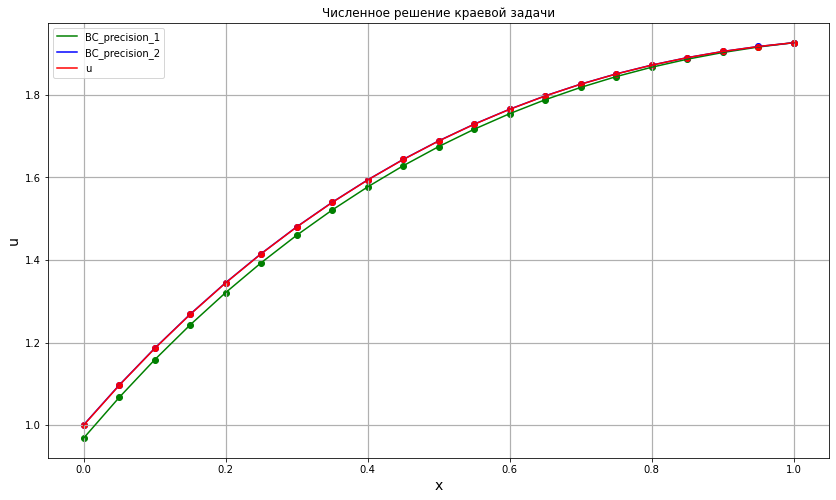

In [9]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(x_plot, y1_plot, color="green")
ax.plot   (x_plot, y1_plot, color="green", label='BC_precision_1')  # BC - boundary conditions

ax.scatter(x_plot, y2_plot, color="blue")
ax.plot   (x_plot, y2_plot, color="blue", label='BC_precision_2')

ax.scatter(x_plot, u_plot, color="red")
ax.plot   (x_plot, u_plot, color="red", label='u')


ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("u", fontsize=14)

plt.title("Численное решение краевой задачи")
plt.legend()

plt.show()

In [10]:
errors_plot1 = [abs(y1 - u) for y1, u in zip(y1_plot, u_plot)]
errors_plot2 = [abs(y2 - u) for y2, u in zip(y2_plot, u_plot)]

d = {'errors_plot1': errors_plot1, 'errors_plot2': errors_plot2}

print('Step:', h)

df = pd.DataFrame(d)
df.head(20)

Step: 0.05


,errors_plot1,errors_plot2
0,0.031353,0.000694
1,0.029251,0.000648
2,0.027243,0.000604
3,0.025316,0.000563
4,0.023464,0.000524
5,0.021676,0.000487
6,0.019948,0.000451
7,0.018274,0.000417
8,0.016648,0.000383
9,0.015067,0.000350


#### Точность алгоритмов

In [11]:
# количество узлов сетки

node_min_count = 10
node_max_count = 1000

In [12]:
# вычисление ошибок

h_plot       = []
errors_plot1 = []
errors_plot2 = []

for n in np.arange(node_min_count, node_max_count + 1, step=10):    
    
    x0_plot, h = np.linspace(left, right, n, retstep=True)
    
    a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants(x0_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
    a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants(x0_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)
    
    y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
    y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
    u_plot  = [u(x) for x in x0_plot]
    
    max_error1 = max([abs(y1 - u) for y1, u in zip(y1_plot, u_plot)])
    max_error2 = max([abs(y2 - u) for y2, u in zip(y2_plot, u_plot)])
    
    h_plot.append(h)
    errors_plot1.append(max_error1)
    errors_plot2.append(max_error2)

In [13]:
d = {'h_plot': h_plot, 'errors_plot1': errors_plot1, 'errors_plot2': errors_plot2}

df = pd.DataFrame(d)
df.head(20)

,h_plot,errors_plot1,errors_plot2
0,0.111111,0.069020,0.003420
1,0.052632,0.032990,0.000769
2,0.034483,0.021673,0.000331
3,0.025641,0.016137,0.000184
4,0.020408,0.012853,0.000117
5,0.016949,0.010680,0.000082
6,0.014493,0.009135,0.000060
7,0.012658,0.007981,0.000047
8,0.011236,0.007085,0.000037
9,0.010101,0.006371,0.000030


In [14]:
ln_h_plot       = np.log(h_plot)
ln_errors_plot1 = np.log(errors_plot1)
ln_errors_plot2 = np.log(errors_plot2)

In [15]:
ln_errors_plot2 = ln_errors_plot2[:5]
ln_h_plot2      = ln_h_plot[:5]

ln_errors = [ln_errors_plot1, ln_errors_plot2]
b_order1  = 0
b_order2  = 0

    
# b_order1
for index in range(len(ln_h_plot)):
    b_order1 += ln_h_plot[index] * ln_errors[0][index]
b_order1 *= len(ln_h_plot)

b_order1 -= (np.sum(ln_h_plot) * np.sum(ln_errors[0]))
b_order1 /= (len(ln_h_plot)    * np.sum(np.power(ln_h_plot, 2)) - np.power(np.sum(ln_h_plot), 2))


# b_order2
for index in range(len(ln_h_plot2)):
    b_order2 += ln_h_plot2[index] * ln_errors[1][index]
b_order2 *= len(ln_h_plot2)

b_order2 -= (np.sum(ln_h_plot2) * np.sum(ln_errors[1]))
b_order2 /= (len(ln_h_plot2)    * np.sum(np.power(ln_h_plot2, 2)) - np.power(np.sum(ln_h_plot2), 2))


b_order = [b_order1, b_order2]
b_order

[0.9993747414744973, 1.9903225947085927]

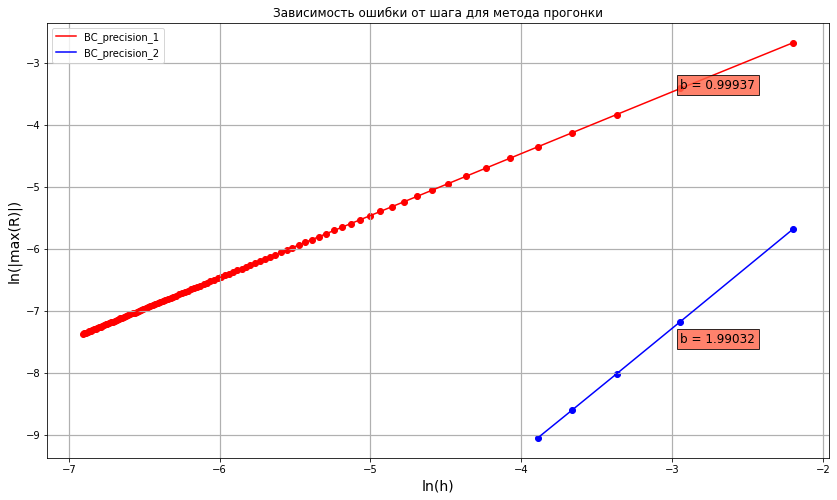

In [16]:
fig, ax = plt.subplots(figsize=(14, 8))

props = dict(boxstyle='square', facecolor='tomato', alpha=0.8)

ax.scatter(ln_h_plot,    ln_errors_plot1, color="red")
ax.plot   (ln_h_plot,    ln_errors_plot1, color="red", label='BC_precision_1')
plt.text  (ln_h_plot[1], ln_errors_plot1[1], "b = {0:.5f}".format(b_order[0]), fontsize = 12, bbox=props)

ax.scatter(ln_h_plot2,  ln_errors_plot2, color="blue")
ax.plot   (ln_h_plot2,  ln_errors_plot2, color="blue", label='BC_precision_2')
plt.text  (ln_h_plot2[1],  ln_errors_plot2[2] + 0.5, "b = {0:.5f}".format(b_order[1]), fontsize = 12, bbox=props)

ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("ln(h)", fontsize=14)        
ax.set_ylabel("ln(|max(R)|)", fontsize=14)

plt.title("Зависимость ошибки от шага для метода прогонки")
plt.legend()

plt.show()

#### Условие 2

$$
\begin{equation}
u'' + \frac{1}{1 + x}u' + \frac{tgx}{1 + x}u = \frac{2 tgx}{1 + x}ln(1 + x) - cosx, \\
u(0) - u'(0) = -1, \\ u'(1) = 0.1585290151921035, \\ u_0(x) = cosx + 2 ln(1 + x) \\
\end{equation}
$$

In [17]:
# шаг сетки
h = 0.05

# построение сетки
x_plot= np.linspace(left, right, round((right - left) / h) + 1)

print("Size of range: ", len(x_plot))
print(x_plot)

Size of range:  21
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [18]:
alpha1 = 1
alpha2 = 0

beta1 = -1
beta2 = 1

gamma1 = -1
gamma2 = u_der(1)

In [19]:
a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)

In [20]:
y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
u_plot  = [u(x) for x in x_plot]

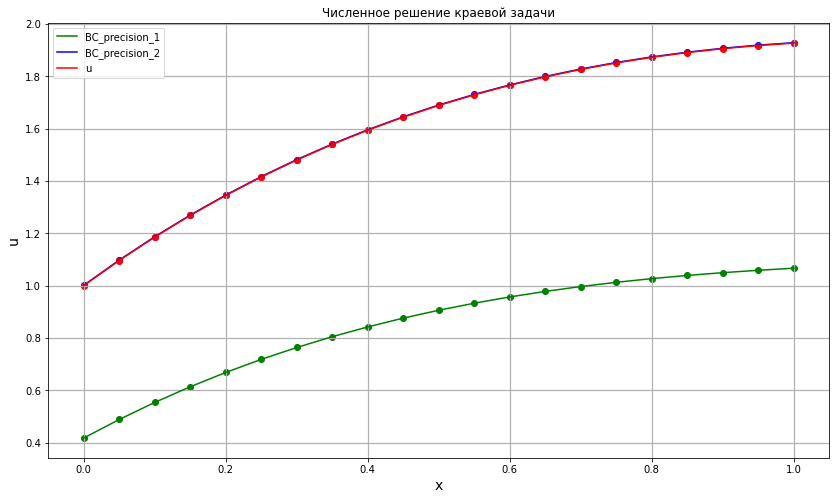

In [21]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(x_plot, y1_plot, color="green")
ax.plot   (x_plot, y1_plot, color="green", label='BC_precision_1')  # BC - boundary conditions

ax.scatter(x_plot, y2_plot, color="blue")
ax.plot   (x_plot, y2_plot, color="blue", label='BC_precision_2')

ax.scatter(x_plot, u_plot, color="red")
ax.plot   (x_plot, u_plot, color="red", label='u')


ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("u", fontsize=14)

plt.title("Численное решение краевой задачи")
plt.legend()

plt.show()

In [22]:
errors_plot1 = [abs(y1 - u) for y1, u in zip(y1_plot, u_plot)]
errors_plot2 = [abs(y2 - u) for y2, u in zip(y2_plot, u_plot)]

d = {'errors_plot1': errors_plot1, 'errors_plot2': errors_plot2}

print('Step:', h)

df = pd.DataFrame(d)
df.head(20)

Step: 0.05


,errors_plot1,errors_plot2
0,0.581596,0.001732
1,0.607007,0.001736
2,0.631163,0.001740
3,0.654105,0.001745
4,0.675859,0.001750
5,0.696446,0.001754
6,0.715877,0.001757
7,0.734156,0.001758
8,0.751284,0.001759
9,0.767253,0.001758


#### Точность алгоритмов

In [23]:
# количество узлов сетки

node_min_count = 10
node_max_count = 1000

In [24]:
# вычисление ошибок

h_plot       = []
errors_plot1 = []
errors_plot2 = []

for n in np.arange(node_min_count, node_max_count + 1, step=10):    
    
    x0_plot, h = np.linspace(left, right, n, retstep=True)
    
    a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants(x0_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
    a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants(x0_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)
    
    y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
    y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
    u_plot  = [u(x) for x in x0_plot]
    
    max_error1 = max([abs(y1 - u) for y1, u in zip(y1_plot, u_plot)])
    max_error2 = max([abs(y2 - u) for y2, u in zip(y2_plot, u_plot)])
    
    h_plot.append(h)
    errors_plot1.append(max_error1)
    errors_plot2.append(max_error2)

In [25]:
d = {'h_plot': h_plot, 'errors_plot1': errors_plot1, 'errors_plot2': errors_plot2}

df = pd.DataFrame(d)
df.head(20)

,h_plot,errors_plot1,errors_plot2
0,0.111111,1.281210,0.008889
1,0.052632,0.885787,0.001950
2,0.034483,0.679690,0.000834
3,0.025641,0.551825,0.000461
4,0.020408,0.464569,0.000292
5,0.016949,0.401184,0.000201
6,0.014493,0.353037,0.000147
7,0.012658,0.315218,0.000112
8,0.011236,0.284722,0.000088
9,0.010101,0.259610,0.000071


In [26]:
ln_h_plot       = np.log(h_plot)
ln_errors_plot1 = np.log(errors_plot1)
ln_errors_plot2 = np.log(errors_plot2)

In [27]:
ln_errors_plot2 = ln_errors_plot2[:5]
ln_h_plot2      = ln_h_plot[:5]

ln_errors = [ln_errors_plot1, ln_errors_plot2]
b_order1  = 0
b_order2  = 0

    
# b_order1
for index in range(len(ln_h_plot)):
    b_order1 += ln_h_plot[index] * ln_errors[0][index]
b_order1 *= len(ln_h_plot)

b_order1 -= (np.sum(ln_h_plot) * np.sum(ln_errors[0]))
b_order1 /= (len(ln_h_plot)    * np.sum(np.power(ln_h_plot, 2)) - np.power(np.sum(ln_h_plot), 2))


# b_order2
for index in range(len(ln_h_plot2)):
    b_order2 += ln_h_plot2[index] * ln_errors[1][index]
b_order2 *= len(ln_h_plot2)

b_order2 -= (np.sum(ln_h_plot2) * np.sum(ln_errors[1]))
b_order2 /= (len(ln_h_plot2)    * np.sum(np.power(ln_h_plot2, 2)) - np.power(np.sum(ln_h_plot2), 2))


b_order = [b_order1, b_order2]
b_order

[0.8930795824688955, 2.0162794217946987]

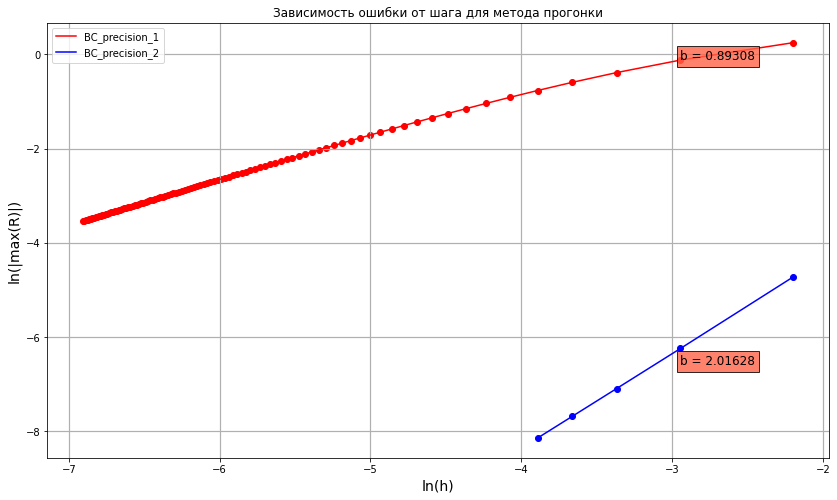

In [28]:
fig, ax = plt.subplots(figsize=(14, 8))

props = dict(boxstyle='square', facecolor='tomato', alpha=0.8)

ax.scatter(ln_h_plot,    ln_errors_plot1, color="red")
ax.plot   (ln_h_plot,    ln_errors_plot1, color="red", label='BC_precision_1')
plt.text  (ln_h_plot[1], ln_errors_plot1[1], "b = {0:.5f}".format(b_order[0]), fontsize = 12, bbox=props)

ax.scatter(ln_h_plot2,  ln_errors_plot2, color="blue")
ax.plot   (ln_h_plot2,  ln_errors_plot2, color="blue", label='BC_precision_2')
plt.text  (ln_h_plot2[1],  ln_errors_plot2[2] + 0.5, "b = {0:.5f}".format(b_order[1]), fontsize = 12, bbox=props)

ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("ln(h)", fontsize=14)        
ax.set_ylabel("ln(|max(R)|)", fontsize=14)

plt.title("Зависимость ошибки от шага для метода прогонки")
plt.legend()

plt.show()

#### Условие 3

$$
\begin{equation}
u'' + \frac{1}{1 + x}u' + \frac{tgx}{1 + x}u = \frac{2 tgx}{1 + x}ln(1 + x) - cosx, \\
u(0) - u'(0) = -1, \\ u(1) + u'(1) = 2.085125682180134, \\ u_0(x) = cosx + 2 ln(1 + x) \\
\end{equation}
$$

In [29]:
# шаг сетки
h = 0.05

# построение сетки
x_plot= np.linspace(left, right, round((right - left) / h) + 1)

print("Size of range: ", len(x_plot))
print(x_plot)

Size of range:  21
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [30]:
alpha1 = 1
alpha2 = 1

beta1 = -1
beta2 = 1

gamma1 = -1
gamma2 = u(1) + u_der(1)

In [31]:
a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants (x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)

In [32]:
y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
u_plot  = [u(x) for x in x_plot]

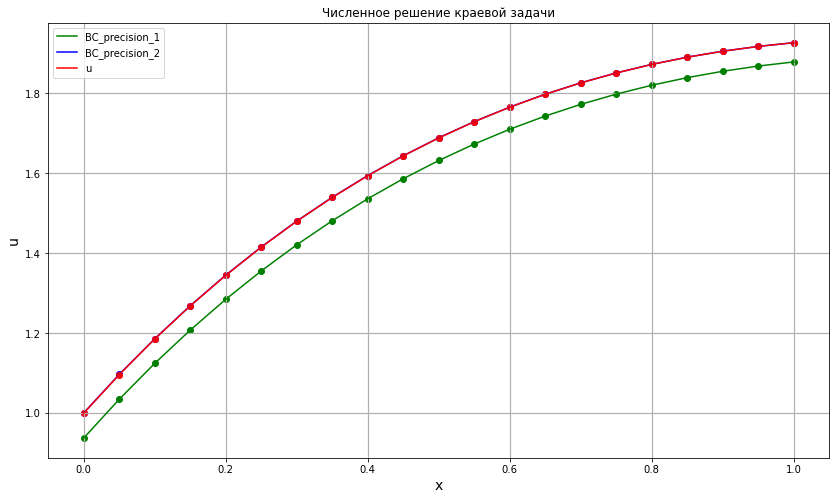

In [33]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(x_plot, y1_plot, color="green")
ax.plot   (x_plot, y1_plot, color="green", label='BC_precision_1')  # BC - boundary conditions

ax.scatter(x_plot, y2_plot, color="blue")
ax.plot   (x_plot, y2_plot, color="blue", label='BC_precision_2')

ax.scatter(x_plot, u_plot, color="red")
ax.plot   (x_plot, u_plot, color="red", label='u')


ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("u", fontsize=14)

plt.title("Численное решение краевой задачи")
plt.legend()

plt.show()

In [34]:
errors_plot1 = [abs(y1 - u) for y1, u in zip(y1_plot, u_plot)]
errors_plot2 = [abs(y2 - u) for y2, u in zip(y2_plot, u_plot)]

d = {'errors_plot1': errors_plot1, 'errors_plot2': errors_plot2}

print('Step:', h)

df = pd.DataFrame(d)
df.head(20)

Step: 0.05


,errors_plot1,errors_plot2
0,0.062099,0.000726
1,0.061535,0.000681
2,0.060988,0.000639
3,0.060452,0.000599
4,0.059918,0.000562
5,0.059381,0.000526
6,0.058835,0.000491
7,0.058275,0.000458
8,0.057698,0.000425
9,0.057098,0.000393


#### Точность алгоритмов

In [35]:
# количество узлов сетки

node_min_count = 10
node_max_count = 1000

In [36]:
# вычисление ошибок

h_plot       = []
errors_plot1 = []
errors_plot2 = []

for n in np.arange(node_min_count, node_max_count + 1, step=10):    
    
    x0_plot, h = np.linspace(left, right, n, retstep=True)
    
    a1_plot, b1_plot, c1_plot, f1_plot = SLE_constants(x0_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
    a2_plot, b2_plot, c2_plot, f2_plot = SLE_constants(x0_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)
    
    y1_plot = Thomas_algorithm(a1_plot, b1_plot, c1_plot, f1_plot)
    y2_plot = Thomas_algorithm(a2_plot, b2_plot, c2_plot, f2_plot)
    u_plot  = [u(x) for x in x0_plot]
    
    max_error1 = max([abs(y1 - u) for y1, u in zip(y1_plot, u_plot)])
    max_error2 = max([abs(y2 - u) for y2, u in zip(y2_plot, u_plot)])
    
    h_plot.append(h)
    errors_plot1.append(max_error1)
    errors_plot2.append(max_error2)

In [37]:
d = {'h_plot': h_plot, 'errors_plot1': errors_plot1, 'errors_plot2': errors_plot2}

df = pd.DataFrame(d)
df.head(20)

,h_plot,errors_plot1,errors_plot2
0,0.111111,0.135520,0.003587
1,0.052632,0.065316,0.000805
2,0.034483,0.043027,0.000345
3,0.025641,0.032079,0.000191
4,0.020408,0.025573,0.000121
5,0.016949,0.021260,0.000083
6,0.014493,0.018193,0.000061
7,0.012658,0.015899,0.000047
8,0.011236,0.014118,0.000037
9,0.010101,0.012697,0.000030


In [38]:
ln_h_plot       = np.log(h_plot)
ln_errors_plot1 = np.log(errors_plot1)
ln_errors_plot2 = np.log(errors_plot2)

In [39]:
ln_errors_plot2 = ln_errors_plot2[:5]
ln_h_plot2      = ln_h_plot[:5]

ln_errors = [ln_errors_plot1, ln_errors_plot2]
b_order1  = 0
b_order2  = 0

    
# b_order1
for index in range(len(ln_h_plot)):
    b_order1 += ln_h_plot[index] * ln_errors[0][index]
b_order1 *= len(ln_h_plot)

b_order1 -= (np.sum(ln_h_plot) * np.sum(ln_errors[0]))
b_order1 /= (len(ln_h_plot)    * np.sum(np.power(ln_h_plot, 2)) - np.power(np.sum(ln_h_plot), 2))


# b_order2
for index in range(len(ln_h_plot2)):
    b_order2 += ln_h_plot2[index] * ln_errors[1][index]
b_order2 *= len(ln_h_plot2)

b_order2 -= (np.sum(ln_h_plot2) * np.sum(ln_errors[1]))
b_order2 /= (len(ln_h_plot2)    * np.sum(np.power(ln_h_plot2, 2)) - np.power(np.sum(ln_h_plot2), 2))


b_order = [b_order1, b_order2]
b_order

[0.9968866219070455, 2.0002214287377984]

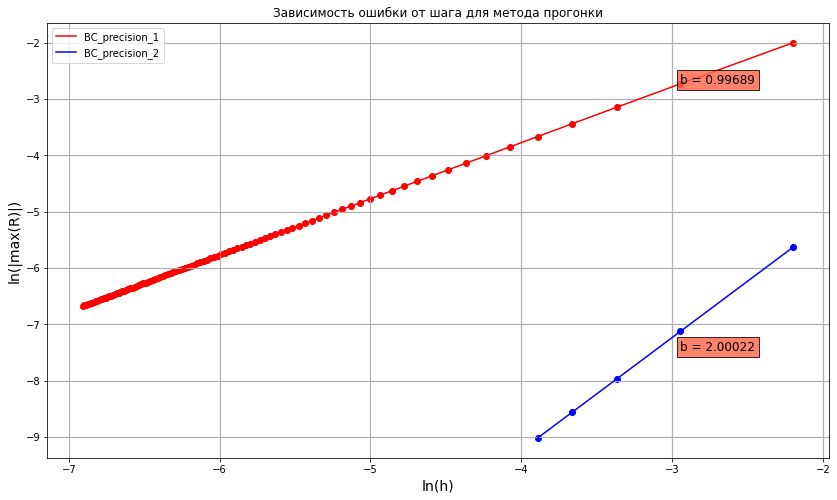

In [40]:
fig, ax = plt.subplots(figsize=(14, 8))

props = dict(boxstyle='square', facecolor='tomato', alpha=0.8)

ax.scatter(ln_h_plot,    ln_errors_plot1, color="red")
ax.plot   (ln_h_plot,    ln_errors_plot1, color="red", label='BC_precision_1')
plt.text  (ln_h_plot[1], ln_errors_plot1[1], "b = {0:.5f}".format(b_order[0]), fontsize = 12, bbox=props)

ax.scatter(ln_h_plot2,  ln_errors_plot2, color="blue")
ax.plot   (ln_h_plot2,  ln_errors_plot2, color="blue", label='BC_precision_2')
plt.text  (ln_h_plot2[1],  ln_errors_plot2[2] + 0.5, "b = {0:.5f}".format(b_order[1]), fontsize = 12, bbox=props)

ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("ln(h)", fontsize=14)        
ax.set_ylabel("ln(|max(R)|)", fontsize=14)

plt.title("Зависимость ошибки от шага для метода прогонки")
plt.legend()

plt.show()